In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import warnings

In [2]:
# Hide warning messages in notebook
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse_drug = pd.read_csv(mouse_drug_data_to_load)
df_clinical_trial = pd.read_csv(clinical_trial_data_to_load)

In [3]:
# Combine the data into a single dataset
df_results = pd.merge(df_clinical_trial, df_mouse_drug, how='left', on='Mouse ID')

# Display the data table for preview
df_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meanTumor = df_results.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
df_meanTumorVolume = meanTumor.drop(columns=['Metastatic Sites'])

# Preview DataFrame
df_meanTumorVolume.reset_index(inplace=True, drop=False)
df_meanTumorVolume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Create a copy of dataframe
df_results_agg = df_results.copy()

# Create a new column to copy values from 'Tumor Volume'
df_results_agg['Tumor Volume (Mean)']=df_results_agg['Tumor Volume (mm3)']
df_results_agg['Tumor Volume (Stde)']=df_results_agg['Tumor Volume (mm3)']

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint AND 
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
agg_dict={'Tumor Volume (Mean)': np.mean,
          'Tumor Volume (Stde)': sem}

df_TumorVol = df_results_agg.groupby(['Drug', 'Timepoint']).agg(agg_dict)

# Preview DataFrame
df_TumorVol.reset_index(inplace=True, drop=False)
df_TumorVol.head()

,Drug,Timepoint,Tumor Volume (Mean),Tumor Volume (Stde)
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames


# Preview that Reformatting worked
df_TumorVolRespTreat = df_TumorVol.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (Mean)')
df_TumorVolRespSem = df_TumorVol.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (Stde)')

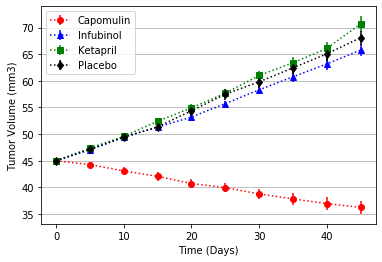

In [7]:
# Generate the Plot
gdp_capomulin = df_TumorVolRespTreat['Capomulin']
gdp_infubinol = df_TumorVolRespTreat['Infubinol']
gdp_ketapril = df_TumorVolRespTreat['Ketapril']
gdp_placebo = df_TumorVolRespTreat['Placebo']

x_axis = df_TumorVolRespTreat.index

# Plot with differently-colored markers.
plt.errorbar(x_axis, gdp_capomulin, df_TumorVolRespSem['Capomulin'], color='red', 
                 linestyle='dotted', marker='o', label='Capomulin')
plt.errorbar(x_axis, gdp_infubinol, df_TumorVolRespSem['Infubinol'], color='blue', 
                 linestyle='dotted', marker='^', label='Infubinol')
plt.errorbar(x_axis, gdp_ketapril, df_TumorVolRespSem['Ketapril'], color='green', 
                 linestyle='dotted', marker='s', label='Ketapril')
plt.errorbar(x_axis, gdp_placebo, df_TumorVolRespSem['Placebo'],color='black', 
                 linestyle='dotted', marker='d', label='Placebo')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.grid(axis='y')

# Save the Figure
plt.savefig('./Images/treatment.png')

In [8]:
# Show the Figure
plt.show()

# Observation 1


Camopulin is the only drug that caused a reduction in tumor volume, compared with the other selected drugs.
The other drugs have similar success rates compared to Placedo, meaning they do not have effect at all.

In [9]:
# ![Tumor Response to Treatment](./Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Create a copy of dataframe
df_resultsMet_agg = df_results.copy()

# Create a new column to copy values from 'Tumor Volume'
df_resultsMet_agg['Metastatic Sites (Mean)']=df_resultsMet_agg['Metastatic Sites']
df_resultsMet_agg['Metastatic Sites (Stde)']=df_resultsMet_agg['Metastatic Sites']

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint AND 
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
agg_dict={'Metastatic Sites (Mean)': np.mean,
          'Metastatic Sites (Stde)': sem}

df_TumorMet = df_resultsMet_agg.groupby(['Drug', 'Timepoint']).agg(agg_dict)

# Preview DataFrame
df_TumorMet.reset_index(inplace=True, drop=False)
df_TumorMet.head()

,Drug,Timepoint,Metastatic Sites (Mean),Metastatic Sites (Stde)
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames

# Remove the Standard Error of Tumor Metastatic
#df_MinorResults = df_TumorMet.drop(columns=['Metastatic Sites (Stde)'])

# Preview that Reformatting worked
df_TumorMetRespTreat = df_TumorMet.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites (Mean)')
df_TumorMetRespSem = df_TumorMet.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites (Stde)')
df_TumorMetRespTreat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


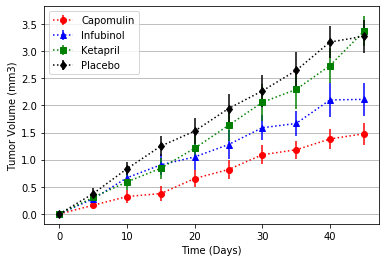

In [12]:
# Generate the Plot
gdp_capomulin = df_TumorMetRespTreat['Capomulin']
gdp_infubinol = df_TumorMetRespTreat['Infubinol']
gdp_ketapril = df_TumorMetRespTreat['Ketapril']
gdp_placebo = df_TumorMetRespTreat['Placebo']

x_axis = df_TumorVolRespTreat.index

# Plot with differently-colored markers.
plt.errorbar(x_axis, gdp_capomulin, df_TumorMetRespSem['Capomulin'], color='red', 
                 linestyle='dotted', marker='o', label='Capomulin')
plt.errorbar(x_axis, gdp_infubinol, df_TumorMetRespSem['Infubinol'], color='blue', 
                 linestyle='dotted', marker='^', label='Infubinol')
plt.errorbar(x_axis, gdp_ketapril, df_TumorMetRespSem['Ketapril'], color='green', 
                 linestyle='dotted', marker='s', label='Ketapril')
plt.errorbar(x_axis, gdp_placebo, df_TumorMetRespSem['Placebo'], color='black', 
                 linestyle='dotted', marker='d', label='Placebo')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.grid(axis='y')

# Save the Figure

plt.savefig('./Images/spread.png')

# Observation 2


Considering the standard error, Camopulin and Infubinol has similar results when it comes to Metastasis rates, but still Camopulin proved to be more effective.

In [13]:
#![Metastatic Spread During Treatment](./Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_MouseCount = df_results.copy()
df_MouseCount = df_MouseCount.groupby(['Drug', 'Timepoint']).count()

# Convert to DataFrame

# Preview DataFrame
df_MouseCount.reset_index(inplace=True, drop=False)
df_MouseCount

,Drug,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,25,25,25
1,Capomulin,5,25,25,25
2,Capomulin,10,25,25,25
3,Capomulin,15,24,24,24
4,Capomulin,20,23,23,23
...,...,...,...,...,...
95,Zoniferol,25,16,16,16
96,Zoniferol,30,15,15,15
97,Zoniferol,35,14,14,14
98,Zoniferol,40,14,14,14


In [15]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
df_MouseCount = df_MouseCount.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
df_MouseCount

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [16]:
df_MouseCount_per = df_MouseCount.div(df_MouseCount.ix[0]) * 100
df_MouseCount_per.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


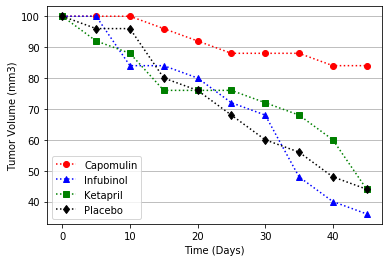

In [17]:
# Generate the Plot
gdp_capomulin = df_MouseCount_per['Capomulin']
gdp_infubinol = df_MouseCount_per['Infubinol']
gdp_ketapril = df_MouseCount_per['Ketapril']
gdp_placebo = df_MouseCount_per['Placebo']

x_axis = df_MouseCount_per.index

# Plot with differently-colored markers.
plt.plot(x_axis, gdp_capomulin, color='red', linestyle='dotted', marker='o', label='Capomulin')
plt.plot(x_axis, gdp_infubinol, color='blue', linestyle='dotted', marker='^', label='Infubinol')
plt.plot(x_axis, gdp_ketapril, color='green', linestyle='dotted', marker='s', label='Ketapril')
plt.plot(x_axis, gdp_placebo, color='black', linestyle='dotted', marker='d', label='Placebo')

# Create legend.
plt.legend(loc='bottom left')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.grid(axis='y')

# Save the Figure

plt.savefig('./Images/survival.png')

# Observation 3

Infubinol has the worst rate of survival at the end of 40 days. Once again, the Capomulin drug has the best results, when it cames to survival rates.

In [18]:
#![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
df_changes = df_TumorVol.copy()
drugs_selected = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

df_0 = df_changes[df_changes['Timepoint'] == 0]
df_0 = df_0[df_0.Drug.isin(drugs_selected)]
df_0.reset_index(drop=True, inplace=True)
df_0

,Drug,Timepoint,Tumor Volume (Mean),Tumor Volume (Stde)
0,Capomulin,0,45.0,0.0
1,Infubinol,0,45.0,0.0
2,Ketapril,0,45.0,0.0
3,Placebo,0,45.0,0.0


In [20]:
df_45 = df_changes[df_changes['Timepoint'] == 45]
df_45 = df_45[df_45.Drug.isin(drugs_selected)]
df_45.reset_index(drop=True, inplace=True)
df_45

#list_of_drugs=df_0['Drug'].unique()

,Drug,Timepoint,Tumor Volume (Mean),Tumor Volume (Stde)
0,Capomulin,45,36.236114,1.223977
1,Infubinol,45,65.755562,1.144427
2,Ketapril,45,70.662958,1.453186
3,Placebo,45,68.084082,1.351726


In [21]:
p_changes=[]
drug_labels=[]
for i, drug in enumerate(drugs_selected):
    time_0 = df_0[df_0['Drug'] == drug]['Tumor Volume (Mean)'][i]
    time_45 = df_45[df_45['Drug'] == drug]['Tumor Volume (Mean)'][i]
    
    p_change = (time_45 - time_0) / time_0 * 100
    
    drug_labels.append(drug)
    p_changes.append(p_change)
       
# percent_changes={}   
# percent_changes[drug] = p_change

In [22]:
# Display the data to confirm
p_changes

[-19.475302667894173, 46.12347172785184, 57.028794686606076, 51.29796048315153]

In [23]:
# Display the data to confirm
drug_labels

['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

In [24]:
x_axis=np.arange(len(drug_labels))
x_axis

array([0, 1, 2, 3])

In [25]:
y_axis=np.arange(-20, 80, 20)
y_axis

array([-20,   0,  20,  40,  60])

In [26]:
# Use functions to label the percentages of changes

def negativeLabels(ax, value):
    
    per_1 = '{0:2.0f}%'.format(value)
    ax.text(-0.5, -5, per_1, ha='center', va='center', color='white')


def positiveLabels(ax, value):
    per_2 = '{0:2.0f}%'.format(value[0])
    ax.text(0.5, 5, per_2, ha='center', va='center', color='white')

    per_3 = '{0:2.0f}%'.format(value[1])
    ax.text(1.5, 5, per_3, ha='center', va='center', color='white')

    per_4 = '{0:2.0f}%'.format(value[2])
    ax.text(2.5, 5, per_4, ha='center', va='center', color='white')

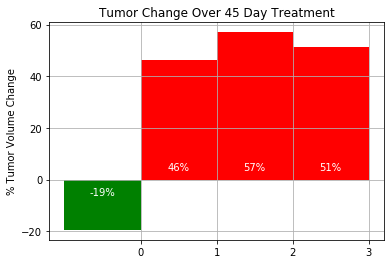

In [27]:
fig, ax = plt.subplots()
#x_axis=np.arange(len(drug_labels))

# Splice the data between passing and failing drugs
x_neg = [x for x in p_changes if x<0]
x_pos = [x for x in p_changes if x>0]

# Set x axis as defined array
ax.set_xticks(x_axis)
ax.set_yticks(y_axis)

# To align the bars on the right edge pass a negative width and align='edge'.
ax.bar(x_axis[0], x_neg, color='green', align='edge', width=-1)

# Call functions to implement the function calls
negativeLabels(ax, x_neg[0])
positiveLabels(ax, x_pos)


ax.bar(x_axis[1:4], x_pos, color='red', align='edge', width=-1)

# Orient widths. Add labels, tick marks, etc. 
#plt.xticks(x_axis, drug_labels)

plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')


ax.grid()

# Save the Figure
plt.savefig('./Images/change.png')

In [28]:
#![Metastatic Spread During Treatment](../Images/change.png)